In [39]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

In [11]:
wine = pd.read_csv("winequality-red.csv", sep=';')

In [12]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
x = wine.drop(columns = 'quality')
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
y = wine.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [16]:
# BAGGING CLASSIFIER

from sklearn.ensemble import BaggingClassifier
bagging_classifier_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)

In [17]:
bagging_classifier_dt

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [18]:
bagging_classifier_dt.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [19]:
bagging_classifier_dt.predict(x_test)

array([6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 7, 7, 6, 5, 4, 7, 6,
       6, 7, 5, 5, 5, 7, 5, 6, 6, 6, 6, 6, 7, 7, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 7, 5, 6,
       5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 7, 6, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 7, 6, 6, 5, 5, 5, 7, 7, 6, 6, 5, 5, 5, 6, 6, 5,
       6, 5, 8, 5, 6, 6, 5, 7, 6, 6, 5, 7, 5, 5, 5, 6, 5, 5, 6, 7, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 8, 6, 5, 5, 6, 7, 6, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 7, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 6, 6,
       7, 7, 7, 5, 5, 6, 5, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 7, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 5, 6, 6, 6,
       5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 7, 5, 5, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6,

In [20]:
bagging_classifier_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [21]:
bagging_classifier_dt.estimator_params

()

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
bagging_classifier_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

In [24]:
bagging_classifier_knn

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [25]:
bagging_classifier_knn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [26]:
bagging_classifier_knn.predict(x_test)

array([5, 5, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 7, 6, 6, 5, 6, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 5,
       5, 7, 8, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 4, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 6, 6, 7, 6, 5,
       6, 5, 6, 5, 5, 7, 5, 7, 7, 6, 5, 7, 6, 5, 5, 6, 5, 5, 5, 7, 5, 5,
       5, 6, 6, 5, 6, 5, 6, 5, 7, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 7, 6,
       5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 6,
       7, 7, 6, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 6, 7, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 7, 5, 8, 7, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6,

In [27]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(n_estimators=10)

In [29]:
rf

RandomForestClassifier(n_estimators=10)

In [30]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [31]:
rf.score(x_test, y_test)

0.685

In [32]:
bagging_classifier_dt.score(x_test, y_test)

0.655

In [33]:
bagging_classifier_knn.score(x_test, y_test)

0.505

In [34]:
# estimators is the number of models present in 1 bag

rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=2033688944),
 DecisionTreeClassifier(max_features='auto', random_state=1384165657),
 DecisionTreeClassifier(max_features='auto', random_state=1220413011),
 DecisionTreeClassifier(max_features='auto', random_state=627739358),
 DecisionTreeClassifier(max_features='auto', random_state=371262966),
 DecisionTreeClassifier(max_features='auto', random_state=1104029760),
 DecisionTreeClassifier(max_features='auto', random_state=1752467092),
 DecisionTreeClassifier(max_features='auto', random_state=431678007),
 DecisionTreeClassifier(max_features='auto', random_state=557748277),
 DecisionTreeClassifier(max_features='auto', random_state=1682336147)]

In [35]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=2033688944)

[Text(435.9680609735414, 530.6571428571428, 'X[7] <= 0.995\ngini = 0.647\nsamples = 772\nvalue = [9, 38, 537, 437, 163, 15]'),
 Text(126.56580732700137, 504.7714285714286, 'X[2] <= 0.305\ngini = 0.684\nsamples = 160\nvalue = [3, 6, 53, 103, 64, 7]'),
 Text(64.35549525101764, 478.8857142857143, 'X[9] <= 0.545\ngini = 0.626\nsamples = 105\nvalue = [3, 6, 49, 77, 16, 1]'),
 Text(24.22795115332429, 453.0, 'X[0] <= 5.3\ngini = 0.553\nsamples = 35\nvalue = [3, 3, 33, 12, 2, 0]'),
 Text(20.189959294436907, 427.11428571428576, 'gini = 0.0\nsamples = 1\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(28.26594301221167, 427.11428571428576, 'X[4] <= 0.095\ngini = 0.502\nsamples = 34\nvalue = [3, 0, 33, 12, 2, 0]'),
 Text(20.189959294436907, 401.22857142857146, 'X[1] <= 0.847\ngini = 0.394\nsamples = 31\nvalue = [0, 0, 33, 9, 2, 0]'),
 Text(16.151967435549526, 375.34285714285716, 'X[7] <= 0.993\ngini = 0.328\nsamples = 29\nvalue = [0, 0, 33, 6, 2, 0]'),
 Text(8.075983717774763, 349.4571428571429, 'X[8] <= 3.3

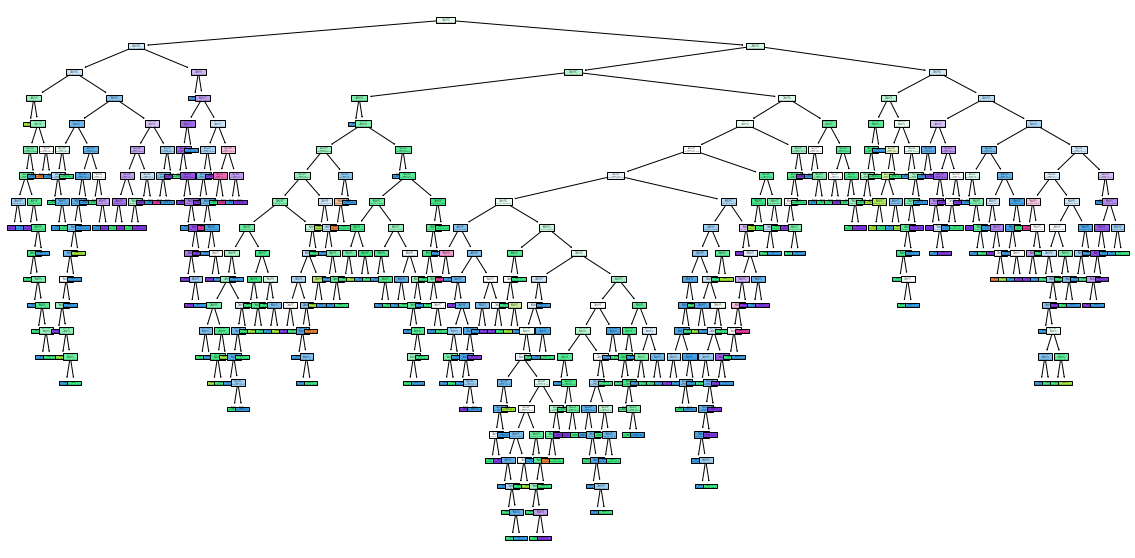

In [41]:
# Plotting the graph of first estimator - 1st decision tree in the random forest

plt.figure(figsize=(20,10))
#tree.plot_tree(rf.estimators_[0],filled=True)

[Text(531.839729981557, 531.7826086956522, 'X[9] <= 0.645\ngini = 0.634\nsamples = 756\nvalue = [11, 33, 519, 488, 131, 17]'),
 Text(244.0244995389226, 508.14782608695657, 'X[9] <= 0.535\ngini = 0.567\nsamples = 450\nvalue = [11, 29, 395, 248, 28, 1]'),
 Text(80.52900945208637, 484.5130434782609, 'X[1] <= 0.308\ngini = 0.497\nsamples = 154\nvalue = [7, 12, 160, 49, 9, 0]'),
 Text(36.019365250134484, 460.8782608695652, 'X[2] <= 0.62\ngini = 0.58\nsamples = 9\nvalue = [0, 2, 1, 12, 6, 0]'),
 Text(30.530700069161608, 437.2434782608696, 'X[10] <= 9.35\ngini = 0.338\nsamples = 7\nvalue = [0, 2, 1, 12, 0, 0]'),
 Text(25.042034888188734, 413.60869565217394, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(36.019365250134484, 413.60869565217394, 'X[0] <= 6.6\ngini = 0.142\nsamples = 6\nvalue = [0, 0, 1, 12, 0, 0]'),
 Text(30.530700069161608, 389.9739130434783, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(41.50803043110736, 389.9739130434783, 'gini = 0.0\nsamples =

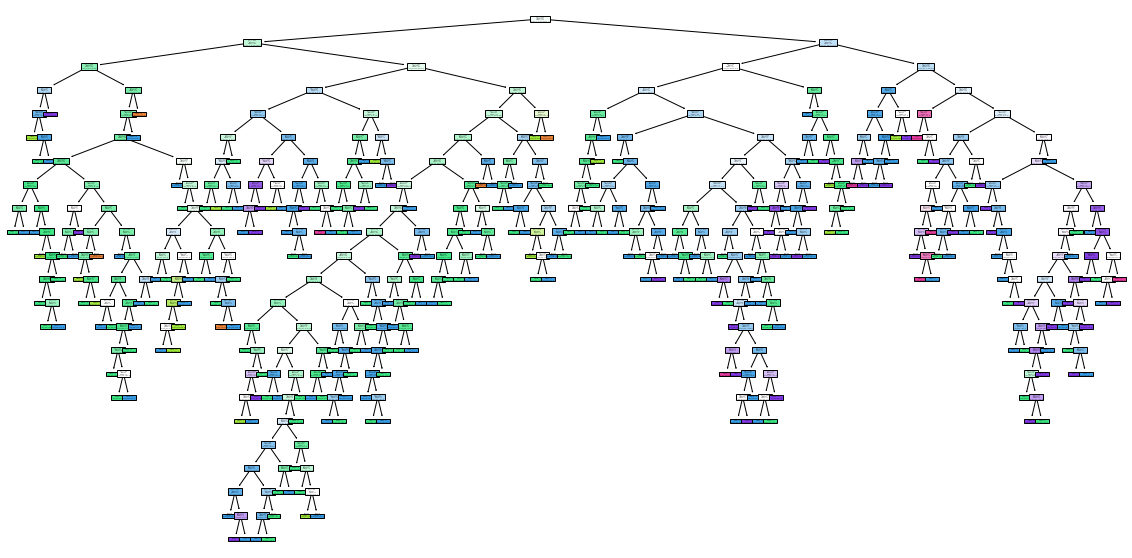

In [42]:
# plotting the first estimator - 2nd decision tree

plt.figure(figsize=(20,10))
tree.plot_tree(rf.estimators_[1],filled=True)

In [ ]:
rf = RandomForestClassifier()

In [43]:
# RANDOM CV SEARCH

grid_parameters = {
                "n_estimators" : [5,10, 15, 20, 25, 30],
                "criterion" : ["gini", "entropy"],
                "max_depth" : range(1,10,1),
                "min_samples_leaf" : range(1,10,1)
}

In [46]:
grid_search_rf = GridSearchCV(param_grid=grid_parameters, cv=10, n_jobs=-1,estimator=rf)

In [47]:
grid_search_rf

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': [5, 10, 15, 20, 25, 30]})

In [48]:
grid_search_rf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': [5, 10, 15, 20, 25, 30]})

In [49]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'n_estimators': 30}

In [50]:
rf_best_params = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=1, n_estimators=30)

In [51]:
rf_best_params

RandomForestClassifier(max_depth=8, n_estimators=30)

In [52]:
rf_best_params.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=30)

In [53]:
rf_best_params.score(x_test, y_test)

0.6725